In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
#from sm.tsa.statespace import SARIMAX
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

## Usamos Pandas para manejar las bases de Datos

In [88]:
data = pd.read_csv('/Users/FAMILIA MORENO/Documents/FMpy/AirPassengers.csv')
#print(data)
print('\n Data Types:')
print(data.dtypes)


 Data Types:
Month          object
NPassengers     int64
dtype: object


## Convertir el conjunto de datos en una serie de Timepo

In [90]:
con=data['Month']
data['Month']=pd.to_datetime(data['Month'])
##data.set_index('Month', inplace=True)
pasajeros=data.set_index('Month')
#check datatype of index
#convert to time series:
tsAirP = pasajeros['NPassengers'] #Extrae los valores de la columna número de pasajeros (NPassengers) 
tsAirP.head(10)
#tsAirP.asfreq(freq='MS')

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
Name: NPassengers, dtype: int64

## Graficar la Serie y transformaciones

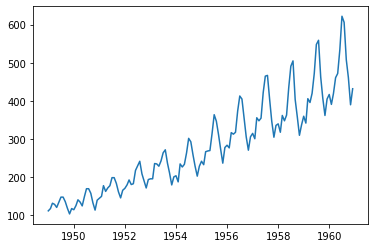

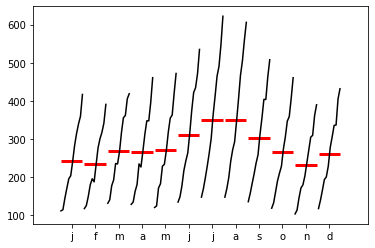

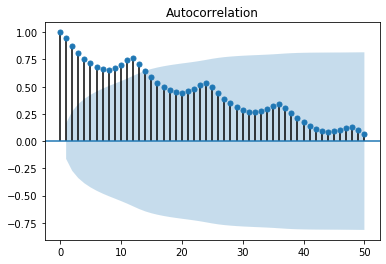

In [9]:
plt.plot(tsAirP)
plt.show()
import statsmodels.api as smapi
smapi.graphics.tsa.month_plot(tsAirP)
acf(tsAirP,nlags=50,unbiased=False)
grafico_acf=plot_acf(tsAirP,lags=50,unbiased=False)

## Transformación Box-Cox

(array([ 6.8274885 ,  6.93282065,  7.16188982,  7.11460912,  6.98378526,
        7.20826372,  7.39959616,  7.39959616,  7.22352663,  6.94993029,
        6.67929963,  6.93282065,  6.88073991,  7.06638216,  7.29843673,
        7.20826372,  7.05008902,  7.41371306,  7.69297564,  7.69297564,
        7.53725821,  7.17744667,  6.86312233,  7.28363782,  7.35675232,
        7.42774947,  7.79166105,  7.60332493,  7.71801202,  7.79166105,
        8.03379751,  8.03379751,  7.86322452,  7.59025107,  7.37111683,
        7.64214063,  7.70552501,  7.81574089,  7.96692809,  7.82769544,
        7.85143669,  8.23478308,  8.35415575,  8.46833511,  8.14152234,
        7.94424449,  7.71801202,  7.97819488,  8.00058081,  8.00058081,
        8.4118638 ,  8.40233325,  8.34441333,  8.47763077,  8.66568382,
        8.73398047,  8.42136   ,  8.16253854,  7.81574089,  8.05570573,
        8.08822236,  7.9098367 ,  8.40233325,  8.32481925,  8.39276809,
        8.66568382,  8.97573447,  8.90544123,  8.62209761,  8.3

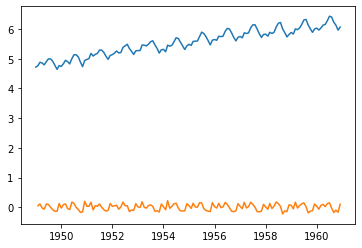

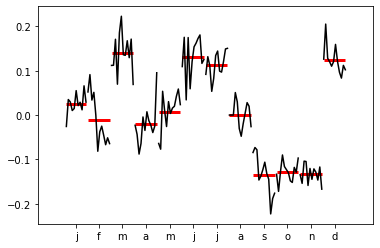

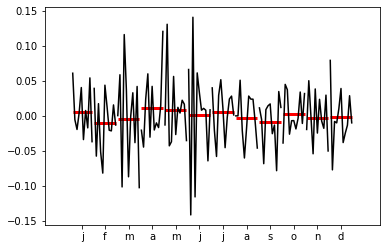

In [15]:
import scipy as sp
import scipy.stats ####En ocasiones puede funcionar la línea 46 sin ésta línea.
sp.stats.boxcox(tsAirP,alpha=0.05) #Como el cero está en el intervalo,se aplica logaritmo
print(sp.stats.boxcox(data['NPassengers'],alpha=0.05))
ltsAirP=np.log(tsAirP)
plt.plot(ltsAirP)
d1ltsAirP=ltsAirP.diff(periods=1)[1:] #diferencia ordinaria
plt.plot(d1ltsAirP)
grafico_month=smapi.graphics.tsa.month_plot(d1ltsAirP)
ds1d1ltsAirP=d1ltsAirP.diff(periods=12)[12:] #Diferencia estacional
grafico2_month=smapi.graphics.tsa.month_plot(ds1d1ltsAirP)

## Identificación

[ 1.00000000e+00 -3.41123798e-01  1.05046750e-01 -2.02138664e-01
  2.13592288e-02  5.56543435e-02  3.08036696e-02 -5.55785695e-02
 -7.60657777e-04  1.76368681e-01 -7.63581912e-02  6.43839399e-02
 -3.86612860e-01  1.51602012e-01 -5.76067980e-02  1.49565220e-01
 -1.38942182e-01  7.04823385e-02  1.56307241e-02 -1.06106130e-02
 -1.16728598e-01  3.85542023e-02 -9.13645276e-02  2.23268906e-01
 -1.84181674e-02 -1.00288116e-01  4.85657567e-02 -3.02396339e-02
  4.71343505e-02 -1.80304684e-02 -5.10696473e-02 -5.37672361e-02
  1.95728483e-01 -1.22419388e-01  7.77498102e-02 -1.52454838e-01
 -9.99501011e-03  4.69202805e-02  3.12375443e-02 -1.50867473e-02
 -3.41315285e-02 -6.55933853e-02  9.50573679e-02 -8.96620926e-02
  2.88258081e-02 -3.68860804e-02 -4.21346581e-02  1.08191597e-01
 -5.01473118e-02  1.05014812e-01 -1.71246719e-02]


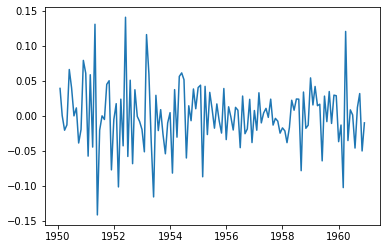

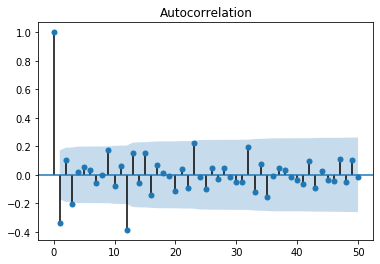

In [76]:
plt.plot(ds1d1ltsAirP)
valor_acf=acf(ds1d1ltsAirP,nlags=50,unbiased=False)
print(valor_acf)
grafico2_acf=plot_acf(ds1d1ltsAirP,lags=50,unbiased=False) 

[ 1.         -0.34374783 -0.01302642 -0.19758354 -0.12951022  0.03413841
  0.03631522 -0.06384474 -0.02170183  0.24354208  0.04759394  0.05148915
 -0.37818039 -0.12733482 -0.09094849 -0.02203178 -0.16621752  0.02950375
  0.14439423 -0.00502836 -0.21109351  0.16153668 -0.08800878  0.18999894
 -0.10575051 -0.13151615 -0.01723155  0.07436317 -0.13832129  0.06982928
 -0.01704042 -0.12003743 -0.02716021  0.02107144 -0.03651035  0.046521
 -0.27113908 -0.0412608   0.01552334  0.08952857 -0.16308297 -0.29729896
  0.14354418 -0.1719076  -0.13421757 -0.09059119 -0.25651573 -0.01133672
 -0.16252721  0.12191396  0.27204372]


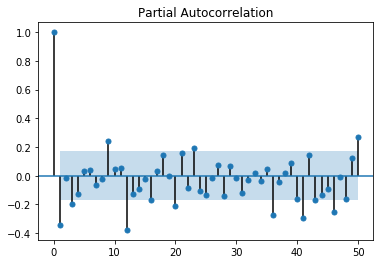

In [75]:
valor_pacf=pacf(ds1d1ltsAirP,nlags=50)
print(valor_pacf)
grafico_pacf=plot_pacf(ds1d1ltsAirP,lags=50)

## Estimación

In [40]:
modeloAR=ARIMA(ds1d1ltsAirP,order=(12,0,0)) ####Ajuste de un AR(12)
ajusteAR=modeloAR.fit(trend='c')
print(ajusteAR.summary()) #Primer y último coef son significativos

modeloMA=ARIMA(ds1d1ltsAirP,order=(0,0,12)) ####Ajuste de un MA(12)
ajusteMA=modeloMA.fit(trend='c')
print(ajusteMA.summary())

modeloMASPmodel = smapi.tsa.statespace.SARIMAX(ds1d1ltsAirP, trend='n', order=(0,0,12))  
results = modeloMASPmodel.fit()
print(results.summary())

C:\Users\FAMILIA MORENO\Documents\AANACONDA\envs\lala\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:            NPassengers   No. Observations:                  131
Model:                    ARMA(12, 0)   Log Likelihood                 243.929
Method:                       css-mle   S.D. of innovations              0.037
Date:                Sun, 09 Jun 2019   AIC                           -459.858
Time:                        19:47:03   BIC                           -419.605
Sample:                    02-01-1950   HQIC                          -443.501
                         - 12-01-1960                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0002      0.002      0.109      0.914      -0.003       0.004
ar.L1.NPassengers     -0.3666      0.080     -4.571      0.000      -0.524      -0.209
ar.L2.NPassengers   

C:\Users\FAMILIA MORENO\Documents\AANACONDA\envs\lala\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\FAMILIA MORENO\Documents\AANACONDA\envs\lala\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\FAMILIA MORENO\Documents\AANACONDA\envs\lala\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                              ARMA Model Results                              
Dep. Variable:            NPassengers   No. Observations:                  131
Model:                    ARMA(0, 12)   Log Likelihood                 250.671
Method:                       css-mle   S.D. of innovations              0.034
Date:                Sun, 09 Jun 2019   AIC                           -473.341
Time:                        19:48:03   BIC                           -433.089
Sample:                    02-01-1950   HQIC                          -456.985
                         - 12-01-1960                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0003      0.000     -0.654      0.514      -0.001       0.001
ma.L1.NPassengers     -0.3047      0.053     -5.748      0.000      -0.409      -0.201
ma.L2.NPassengers   

C:\Users\FAMILIA MORENO\Documents\AANACONDA\envs\lala\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                           Statespace Model Results                           
Dep. Variable:            NPassengers   No. Observations:                  131
Model:              SARIMAX(0, 0, 12)   Log Likelihood                 250.309
Date:                Sun, 09 Jun 2019   AIC                           -474.619
Time:                        19:48:07   BIC                           -437.241
Sample:                    02-01-1950   HQIC                          -459.430
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2984      0.182     -1.641      0.101      -0.655       0.058
ma.L2         -0.0031      0.184     -0.017      0.986      -0.363       0.357
ma.L3         -0.1765      0.217     -0.812      0.4

C:\Users\FAMILIA MORENO\Documents\AANACONDA\envs\lala\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\FAMILIA MORENO\Documents\AANACONDA\envs\lala\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


## Especificando las entradas de los parámetros

In [41]:
ma_orden=[1,0,0,0,0,0,0,0,0,0,0,1]

modeloMASPmodelfinal = smapi.tsa.statespace.SARIMAX(ds1d1ltsAirP, trend='n', order=(0,0,ma_orden))  
####Si tiene parte estacional agregar seasonal_order=(0,0,0,12)###
resultsMAfinal = modeloMASPmodelfinal.fit()

print(resultsMAfinal.summary())

C:\Users\FAMILIA MORENO\Documents\AANACONDA\envs\lala\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             Statespace Model Results                             
Dep. Variable:                NPassengers   No. Observations:                  131
Model:             SARIMAX(0, 0, (1, 12))   Log Likelihood                 241.063
Date:                    Sun, 09 Jun 2019   AIC                           -476.126
Time:                            19:49:06   BIC                           -467.501
Sample:                        02-01-1950   HQIC                          -472.621
                             - 12-01-1960                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2970      0.068     -4.390      0.000      -0.430      -0.164
ma.L12        -0.4605      0.093     -4.932      0.000      -0.644      -0.277
sigma2         0.001

## Etapa de pronósticos

In [56]:
modeloMASPmodelfinal

In [63]:
pronosticosMA=resultsMAfinal.forecast(steps=12)
salforecastMA=resultsMAfinal.get_prediction(start=131, end=142,full_results=True,alpha=0.05,dynamic=False)

In [58]:
salforecastMA.conf_int(alpha=0.05)

,lower NPassengers,upper NPassengers
1961-01-01,-0.062340,0.086304
1961-02-01,-0.070507,0.084554
1961-03-01,-0.033480,0.121581
1961-04-01,-0.121075,0.033986
1961-05-01,-0.079464,0.075597
1961-06-01,-0.072481,0.082580
1961-07-01,-0.082986,0.072075
1961-08-01,-0.062814,0.092247
1961-09-01,-0.080703,0.074358
1961-10-01,-0.091804,0.063257


In [62]:
salforecastMAotro=resultsMAfinal.get_forecast(steps=12)
ICforecastMA95=salforecastMAotro.conf_int(alpha=0.05)
pronosticosMA=salforecastMAotro.predicted_mean

## Gráfica de los pronósticos

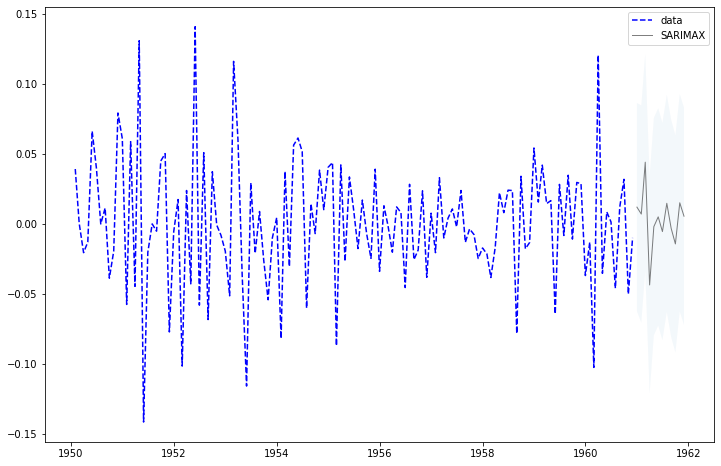

In [65]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
#Actual data
ax.plot(ds1d1ltsAirP.astype('float64'), '--', color="blue", label='data')
# Means
ax.plot(pronosticosMA, lw=1, color="black", alpha=0.5, label='SARIMAX')
ax.fill_between(pronosticosMA.index, ICforecastMA95.iloc[:, 0], ICforecastMA95.iloc[:, 1], alpha=0.05)
ax.legend(loc='upper right')
plt.draw()

## Análisis de Residuales

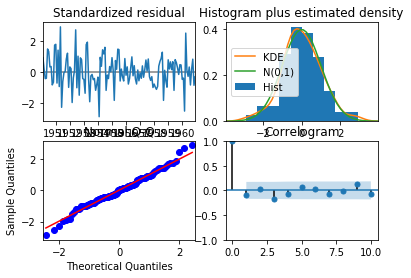

array([[[ 1.18508286,  1.2324956 ,  5.21276045,  6.0800316 ,
          6.73309623,  6.91890113,  7.57843068,  7.63428893,
          9.74204994, 10.41027053, 10.4112674 , 12.23110522,
         14.64361447, 14.92842398, 15.82922457, 20.11613641,
         20.28440522, 20.31364702, 20.98101409, 22.59214769,
         22.64573558, 23.09528546, 30.92096106, 30.95549945,
         31.01767045, 31.84894532, 31.85401712, 32.0508723 ,
         32.4673941 , 33.4149928 , 34.06657065, 38.37058368,
         41.37812665, 41.41653896, 42.59384166, 42.67467122,
         44.42220358, 45.50459767, 45.51153531, 45.76060893],
        [ 0.27632365,  0.5399667 ,  0.15686446,  0.19325066,
          0.24125897,  0.32841239,  0.37122935,  0.46998365,
          0.37176859,  0.40526547,  0.49381625,  0.4273024 ,
          0.33012619,  0.38306501,  0.39349147,  0.21503541,
          0.25994152,  0.31544116,  0.33785092,  0.30926167,
          0.36315383,  0.39636591,  0.12474732,  0.15506994,
          0.18843433,  

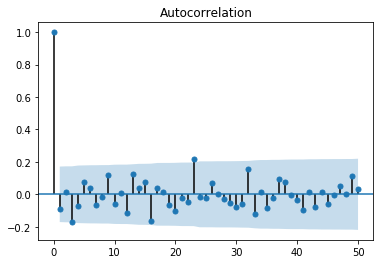

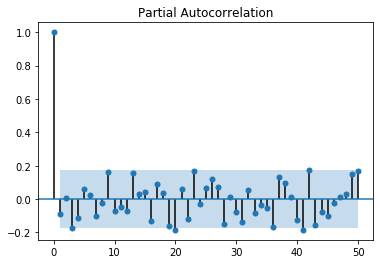

In [68]:
residuales=resultsMAfinal.resid
resultsMAfinal.plot_diagnostics()
plt.show()

resultsMAfinal.test_heteroskedasticity(method='breakvar')
#valor estadística, pvalor #H0: No hay heterocedasticidad
resultsMAfinal.test_normality(method='jarquebera')
#chi cuadrado, pvalor, intervalo
acf(residuales,nlags=50,unbiased=False)
plot_acf(residuales,lags=50,unbiased=False)
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
pacf(residuales,nlags=50)
grafico2_pacf=plot_pacf(residuales,lags=50)

resultsMAfinal.test_serial_correlation(method='ljungbox') #Array pvalores #H0:No hay autocorrelación errores


## Simulación

In [79]:
import numpy as np

import statsmodels as sm
import matplotlib.pylab as plt
import pandas as pd
import statsmodels.api as smapi

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
###
import pmdarima as pm
import pmdarima as pm

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                  250
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -373.945
Date:                Sun, 09 Jun 2019   AIC                            753.890
Time:                        20:08:21   BIC                            764.454
Sample:                             0   HQIC                           758.142
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6412      0.053     12.213      0.000       0.538       0.744
ma.L1          0.5832      0.062      9.461      0.000       0.462       0.704
sigma2         1.1588      0.108     10.695      0.0

753.8900871631498

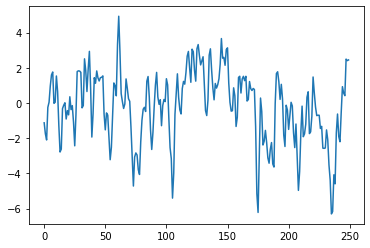

In [80]:
Tlength=250
ar = np.array([1, -0.7]) 
ma = np.array([1,0.6]) # add zero-lag y maparams tiene los otros parámetros
y = sm.tsa.arima_process.arma_generate_sample(ar, ma,Tlength) 
plt.plot(y)
ajuste=pm.auto_arima(y,start_p=0,start_q=0, max_p=3, max_q=3, d=0, D=0, seasonal=False)

ajuste.summary()
modeloest = smapi.tsa.statespace.SARIMAX(y, trend='n', order=(1,0,1))  
####Si tiene parte estacional agregar seasonal_order=(0,0,0,12)###
resultsmodeloest = modeloest.fit()

print(resultsmodeloest.summary())
resultsmodeloest.aic

## Análisis de residuales

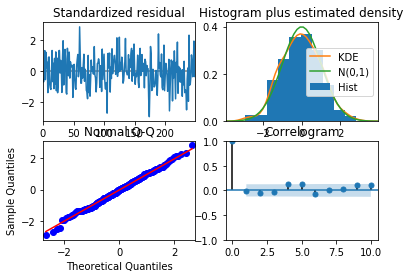

C:\Users\FAMILIA MORENO\Documents\AANACONDA\envs\lala\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\FAMILIA MORENO\Documents\AANACONDA\envs\lala\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)
C:\Users\FAMILIA MORENO\Documents\AANACONDA\envs\lala\lib\site-packages\statsmodels\tsa\statespace\representation.py:375: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return matrix[[slice(None)]*(matrix.ndim-1) + [0]]


                                 Statespace Model Results                                 
Dep. Variable:                        NPassengers   No. Observations:                  144
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 244.696
Date:                            Sun, 09 Jun 2019   AIC                           -483.393
Time:                                    20:11:17   BIC                           -474.767
Sample:                                01-01-1949   HQIC                          -479.888
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4014      0.073     -5.496      0.000      -0.545      -0.258
ma.S.L12      -0.5569      0.096   

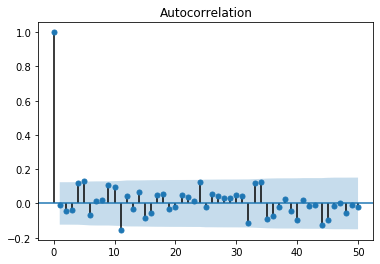

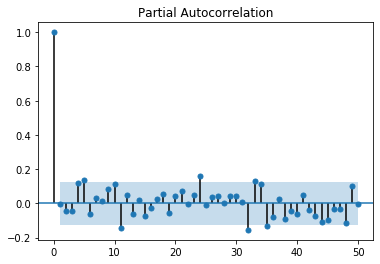

In [82]:
residuales=resultsmodeloest.resid
resultsmodeloest.plot_diagnostics()
plt.show()

acf(residuales,nlags=50,unbiased=False)
plot_acf(residuales,lags=50,unbiased=False)
pacf(residuales,nlags=50)
plot_pacf(residuales,lags=50)

modeloprueba = smapi.tsa.statespace.SARIMAX(np.log(tsAirP), trend='n', order=(0,1,1),seasonal_order=(0,1,1,12))  
resultsmodeloprueba = modeloprueba.fit()

print(resultsmodeloprueba.summary())

residuales=resultsmodeloprueba.resid

In [84]:
resultsmodeloest.test_heteroskedasticity(method='breakvar')

array([[1.28739126, 0.25189725]])

In [85]:
resultsmodeloest.test_normality(method='jarquebera')

array([[0.11611203, 0.94359709, 0.004167  , 2.89475125]])

In [87]:
resultsmodeloest.test_serial_correlation(method='ljungbox')

array([[[1.64431610e-02, 5.23057624e-01, 9.07224593e-01, 4.55376057e+00,
         9.26465380e+00, 1.05226845e+01, 1.05642961e+01, 1.06610762e+01,
         1.39788207e+01, 1.66009983e+01, 2.31141600e+01, 2.35931014e+01,
         2.39145251e+01, 2.51518131e+01, 2.69362778e+01, 2.77354379e+01,
         2.83716589e+01, 2.90750110e+01, 2.93383122e+01, 2.94604256e+01,
         3.01613191e+01, 3.05059268e+01, 3.05496084e+01, 3.48262684e+01,
         3.49909608e+01, 3.59564717e+01, 3.64911447e+01, 3.67978997e+01,
         3.71153875e+01, 3.78582415e+01, 3.83443269e+01, 4.20811380e+01,
         4.64614331e+01, 5.10552633e+01, 5.35174521e+01, 5.50085010e+01,
         5.51417754e+01, 5.53048000e+01, 5.59049502e+01, 5.85140954e+01],
        [8.97966255e-01, 7.69873694e-01, 8.23684008e-01, 3.36220378e-01,
         9.89623390e-02, 1.04296985e-01, 1.58785625e-01, 2.21652264e-01,
         1.23080614e-01, 8.36724212e-02, 1.70311831e-02, 2.30925005e-02,
         3.19254556e-02, 3.30979020e-02, 2.9259844